<a href="https://colab.research.google.com/github/Shaikmd3797/Best-Model-for-GlassClassification-dataset/blob/main/Best_model_for_GLASS_CLASSIFICATION_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Finding the best model for GLASS CLASSIFICATION dataset.***

 # ***AIM:***
     
*  # *Finding the best model for glass classification.*


1.  *data cleaning.*
2.  *label encoding.*
3.  *EDA for dataset.*
4.  *splitting of data*
5.  *scaling of the data*
6.  *build the model* 

 *   Logistic regression algorithm
 *   KNN classifier algorithm
 *   Decision tree classifier algorithm

7.  *evaluate the model*

 *   evaluation of Logistic regression algorithm
 *   evaluation of KNN classifier algorithm
 *   evaluation of Decision tree classifier algorithm








# ***i)  ASSIGNMENT -11 (DATA PREPROCESSING)***

# **1. Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('glass_data.csv',header=None)
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df=df.drop(0, axis=0)
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


In [ ]:
df=df.drop('ID',axis=1)

In [ ]:
df=df.astype(float)
df['Type of glass']=df['Type of glass'].astype(int)

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [ ]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
def data_cleaning(data):
  data=data.dropna() # drop null values from dataset
  data=data.drop_duplicates() # drop duplicate rows
  # outliers should take important role on classification on glass.So outliers is not remove from the dataset
  return data

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df_clean=data_cleaning(df)
df_clean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
def check_imbalance(data,target):
  count_data=pd.DataFrame(data[target].value_counts()).reset_index()
  count_data.columns=[target,'count']
  count_data['percentage']=(count_data['count']/sum(count_data['count']))*100
  count_data.columns=[target,'count','percentage']
  return count_data

In [ ]:
count=check_imbalance(df_clean,'Type of glass')
count

,Type of glass,count,percentage
0,2,76,35.680751
1,1,69,32.394366
2,7,29,13.615023
3,3,17,7.981221
4,5,13,6.103286
5,6,9,4.225352


# **3. EDA of dataset**

In [ ]:
features=[]
for i in df_clean.columns:
  if i != 'Type of glass':
    features.append(i)
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [ ]:
from seaborn.categorical import violinplot
def EDA (data,feature,target):
  for i in feature:
    sns.displot(data ,x=i,hue=target,height=7,aspect=2,palette='viridis')
    plt.xlabel(i)
  for i in range(0,len(feature)-1):
    sns.jointplot(data=data,y=feature[i+1],x=feature[i],hue=target,height=15,s=100,palette='viridis')
  plt.figure(figsize=(20, 10))
  sns.heatmap(data.corr().abs(),  annot=True)
  #sns.pairplot(data,hue=target,height=5,aspect=1)

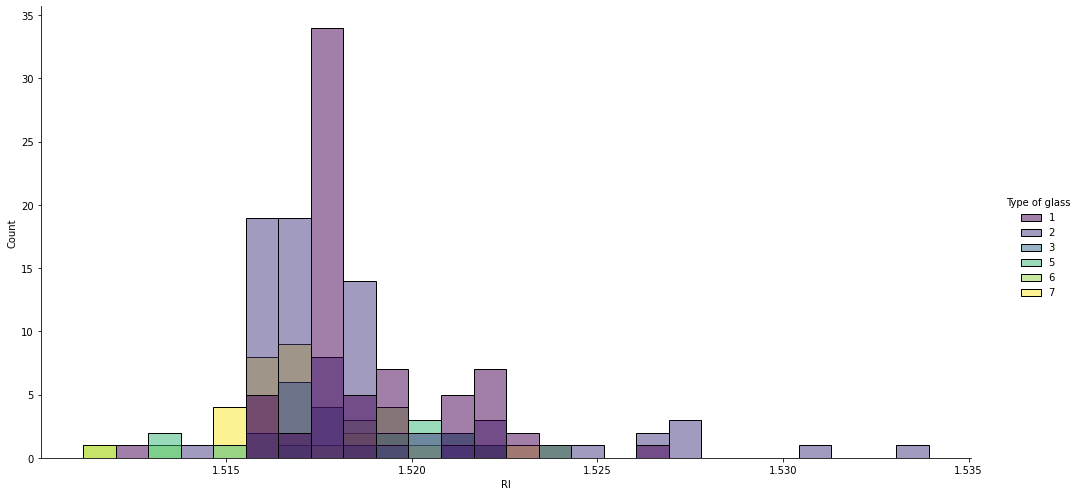

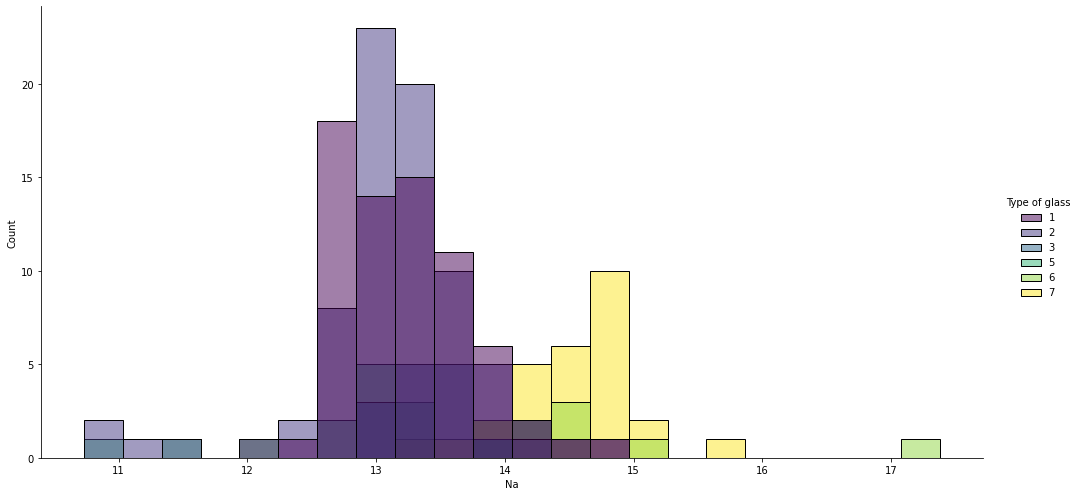

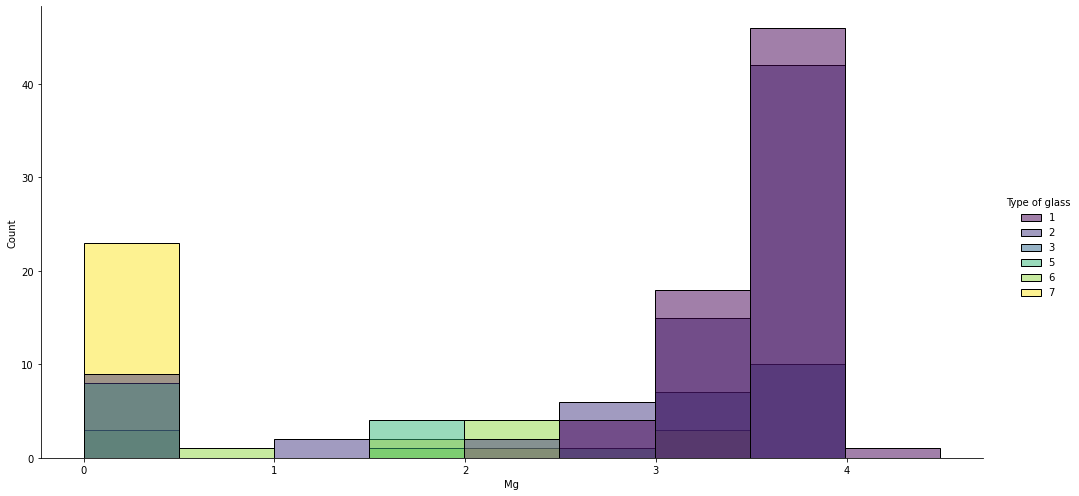

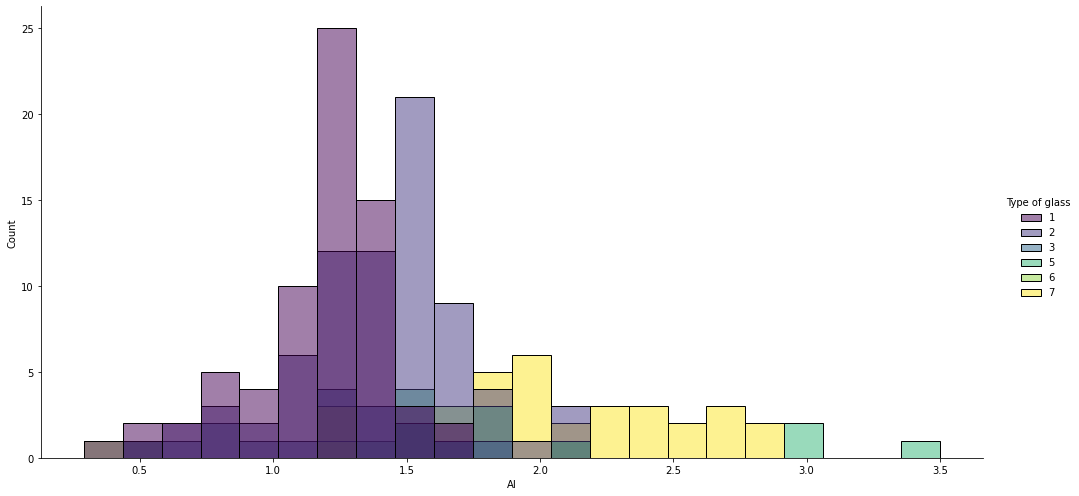

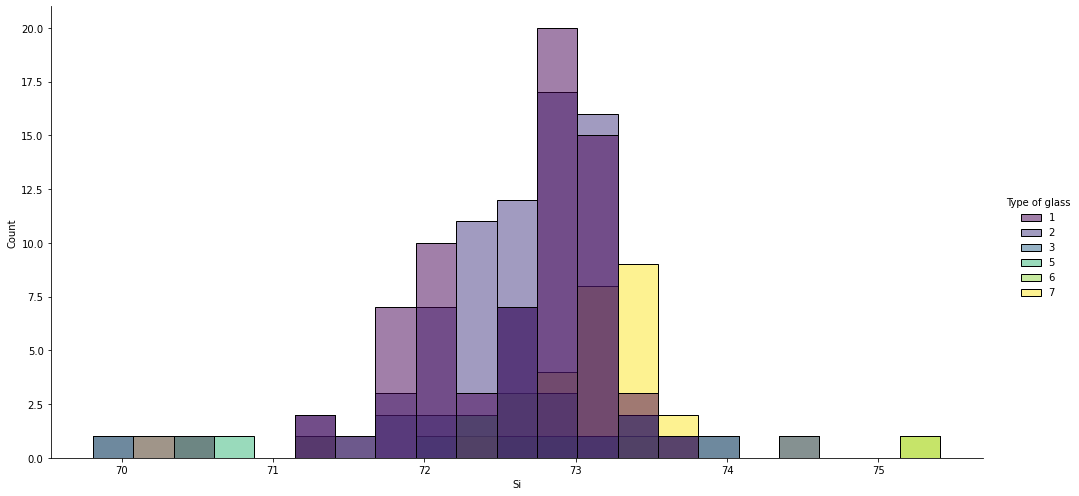

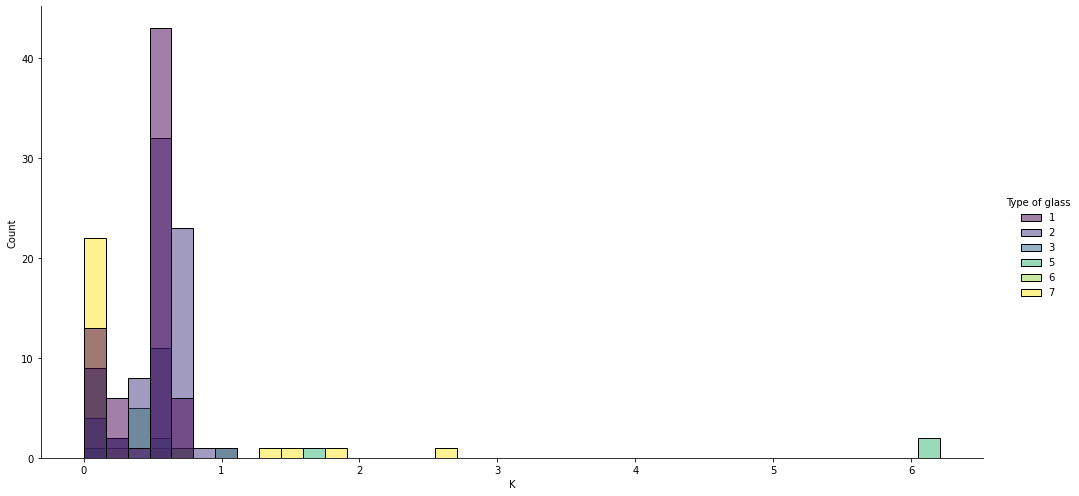

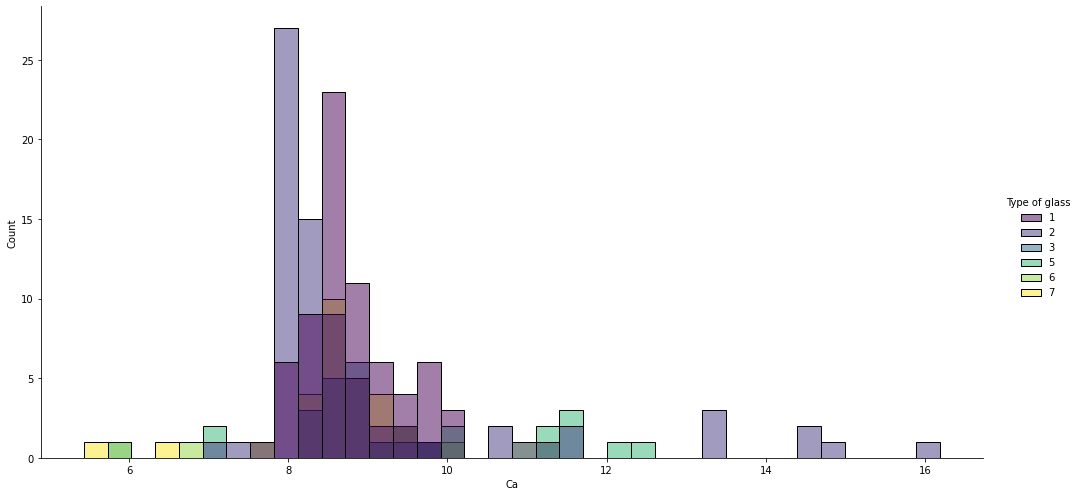

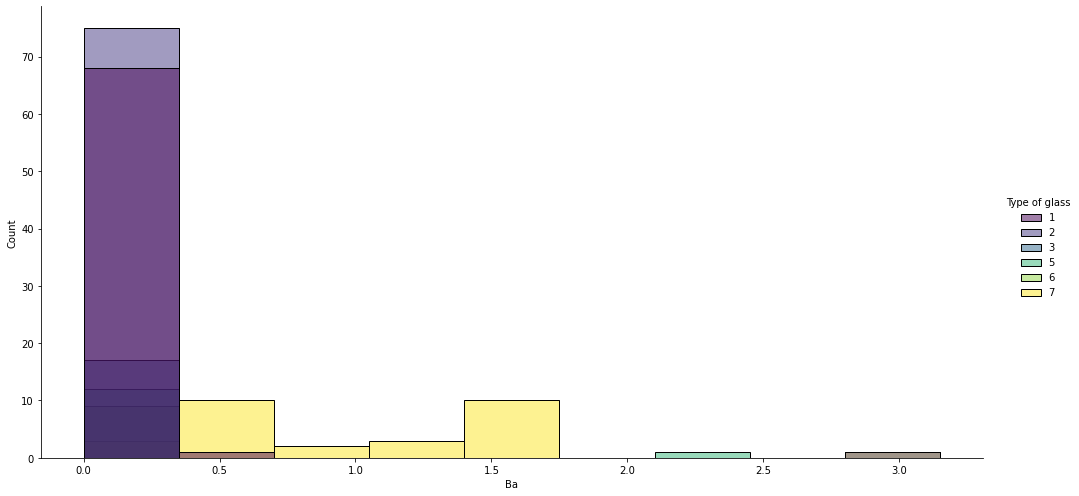

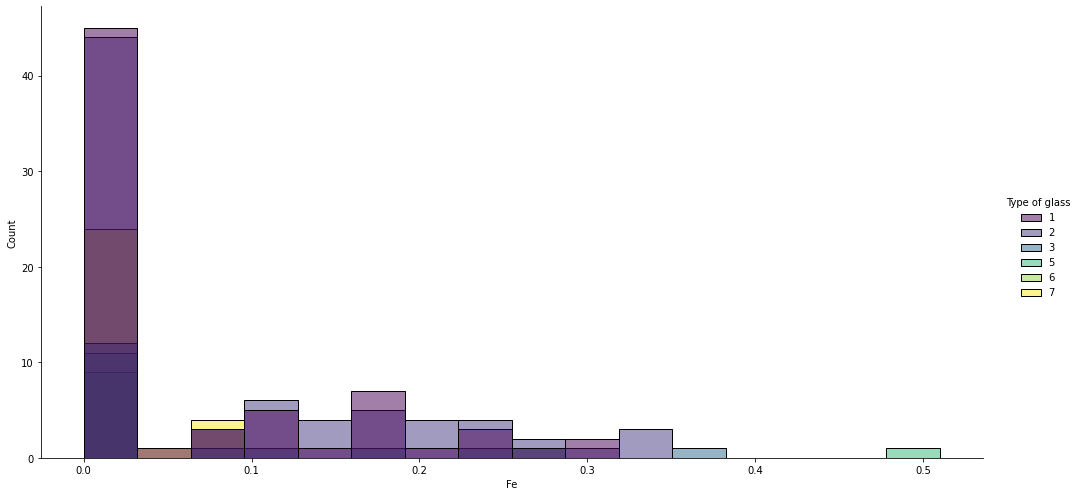

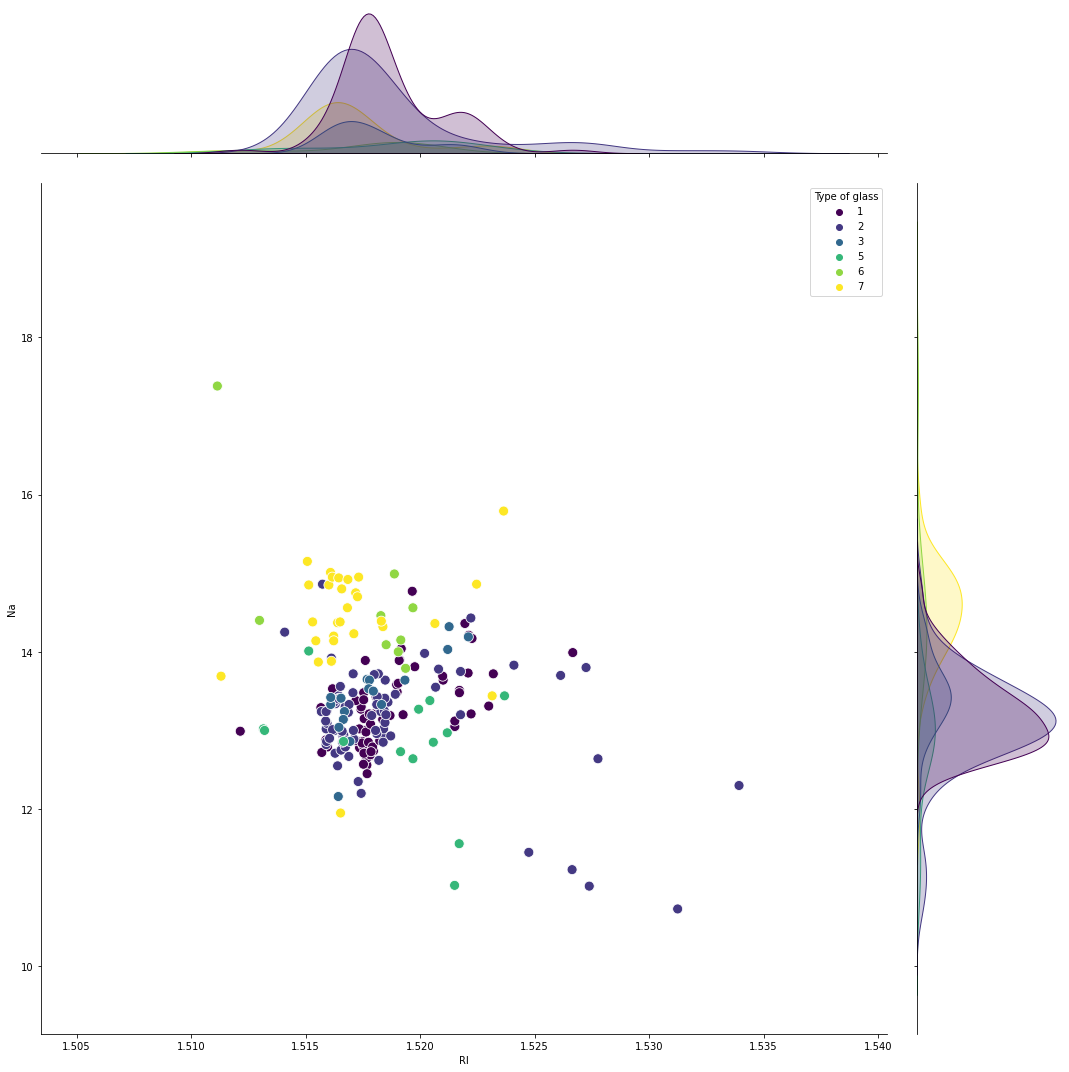

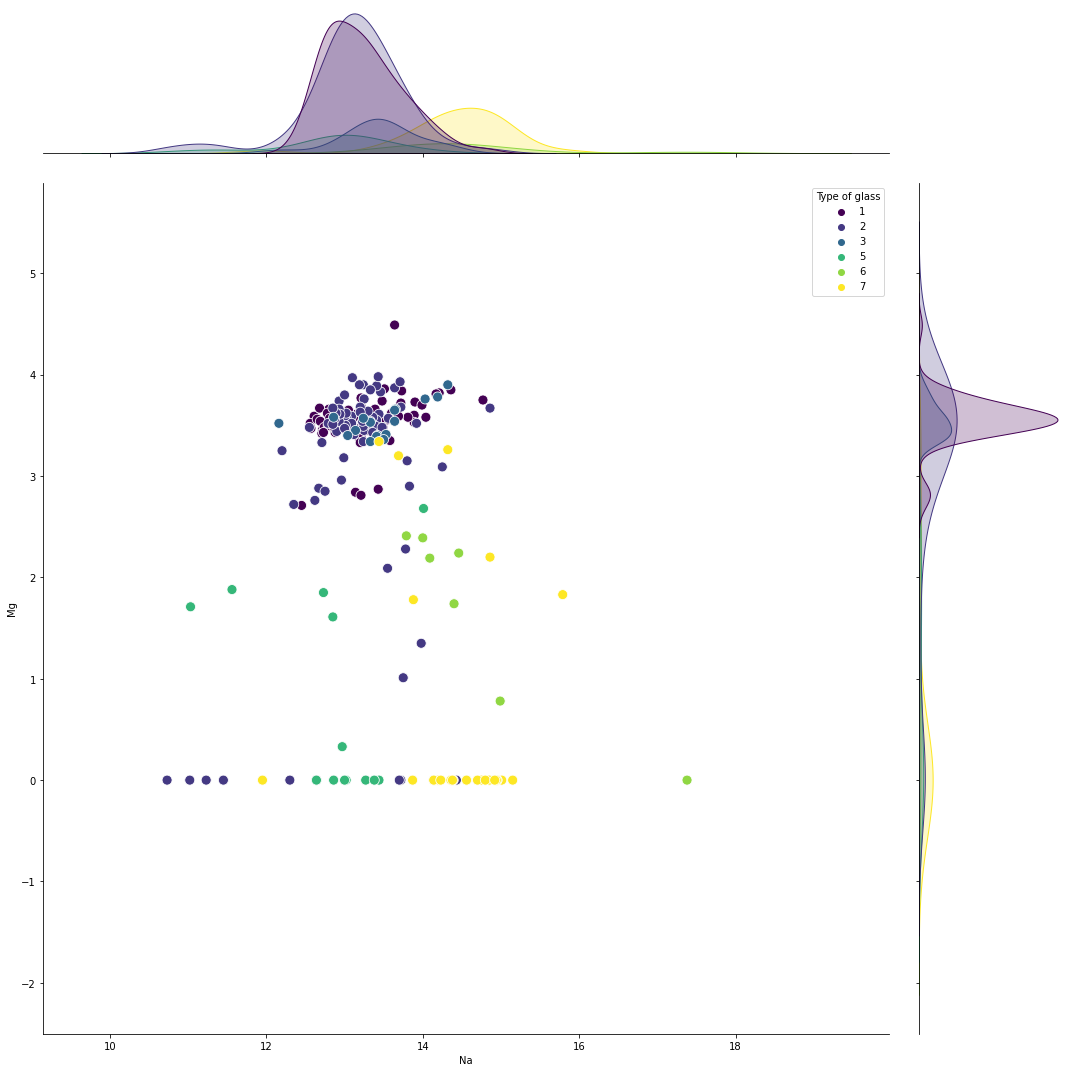

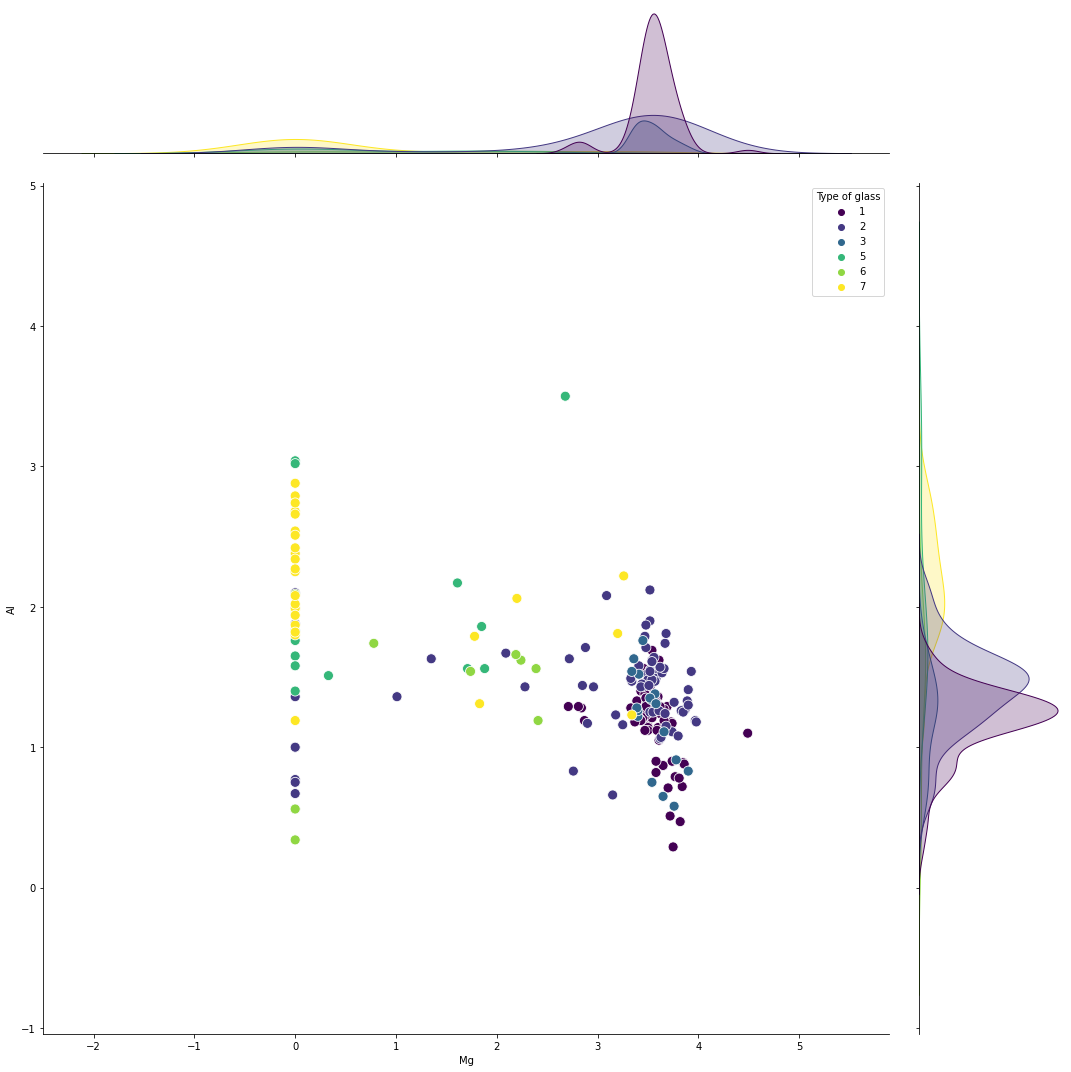

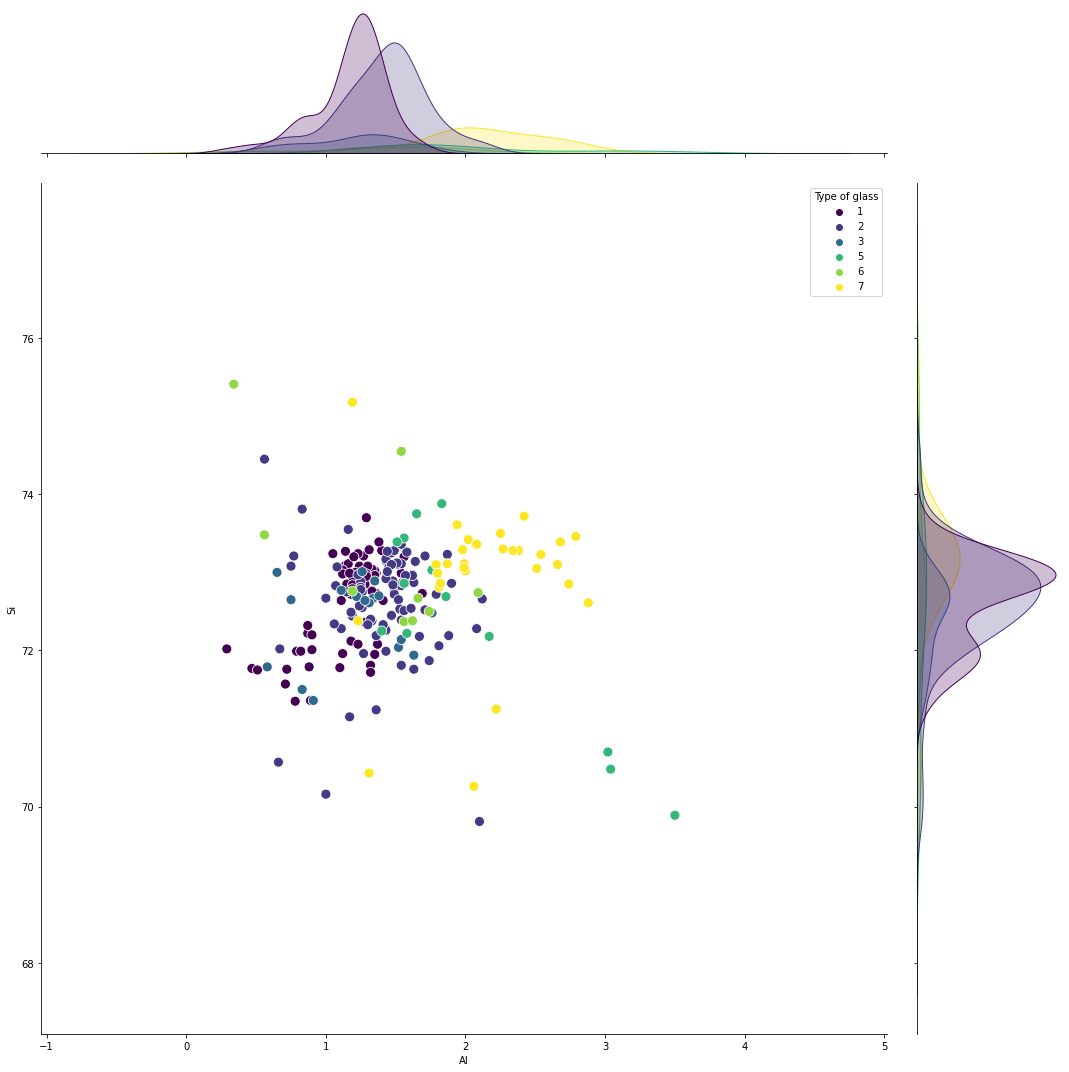

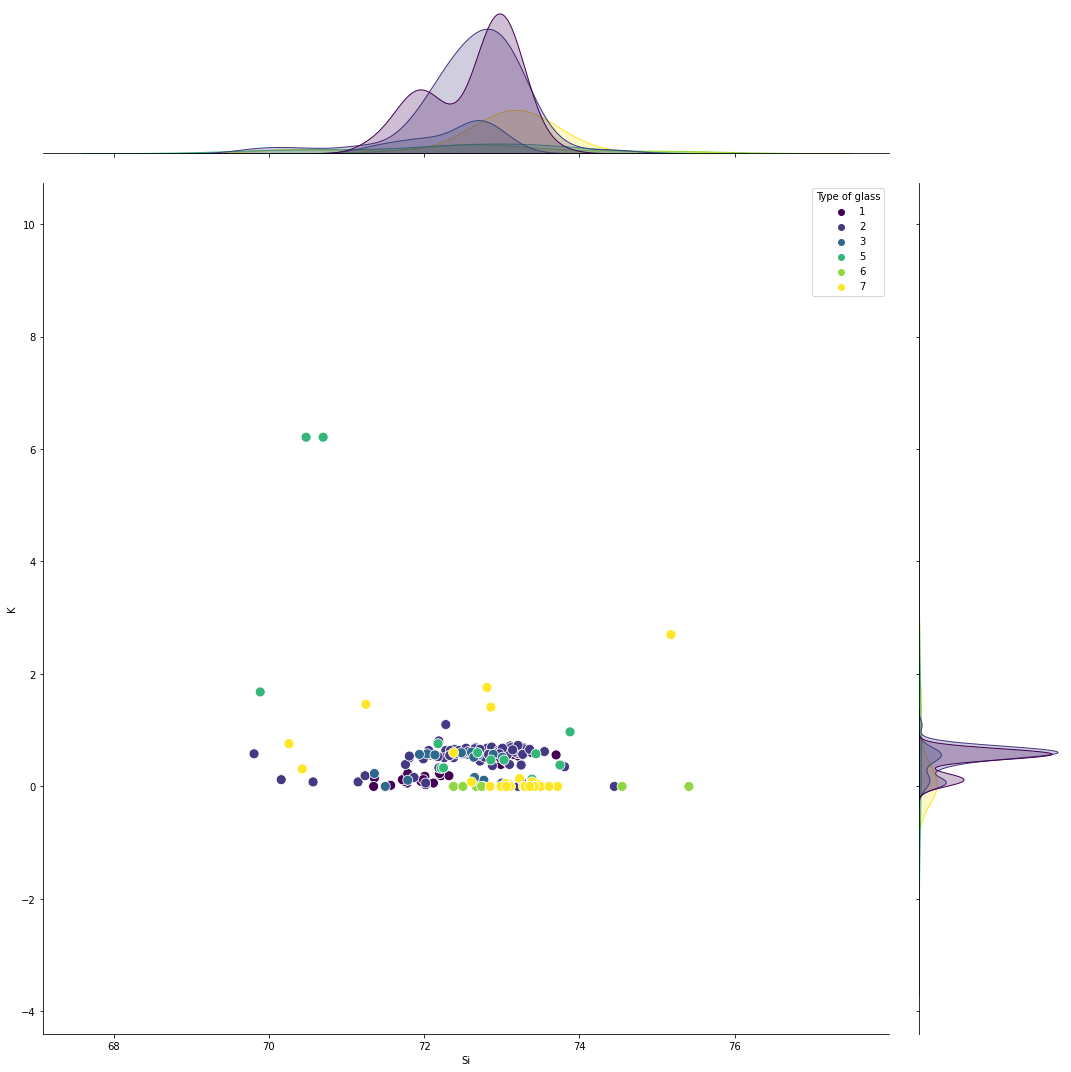

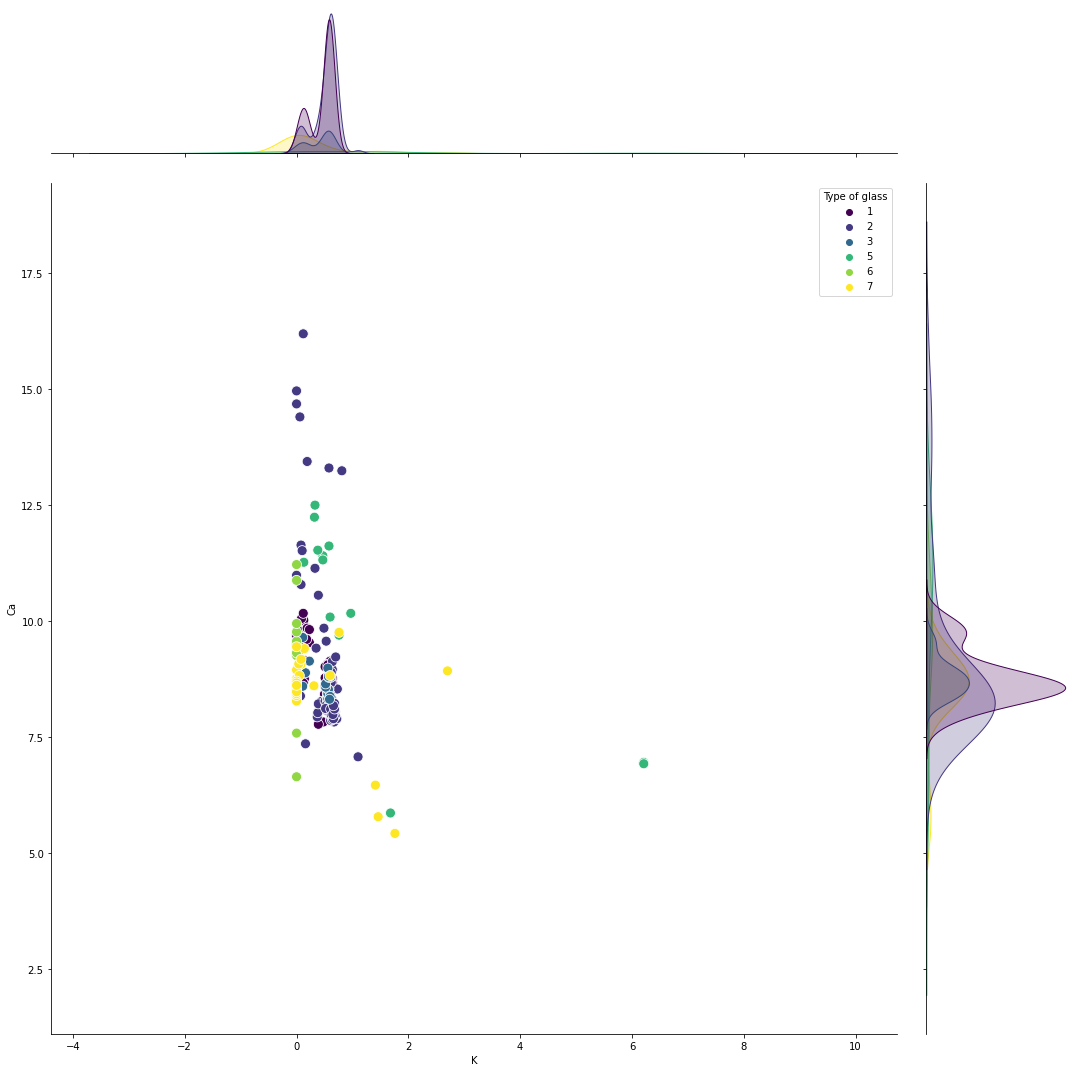

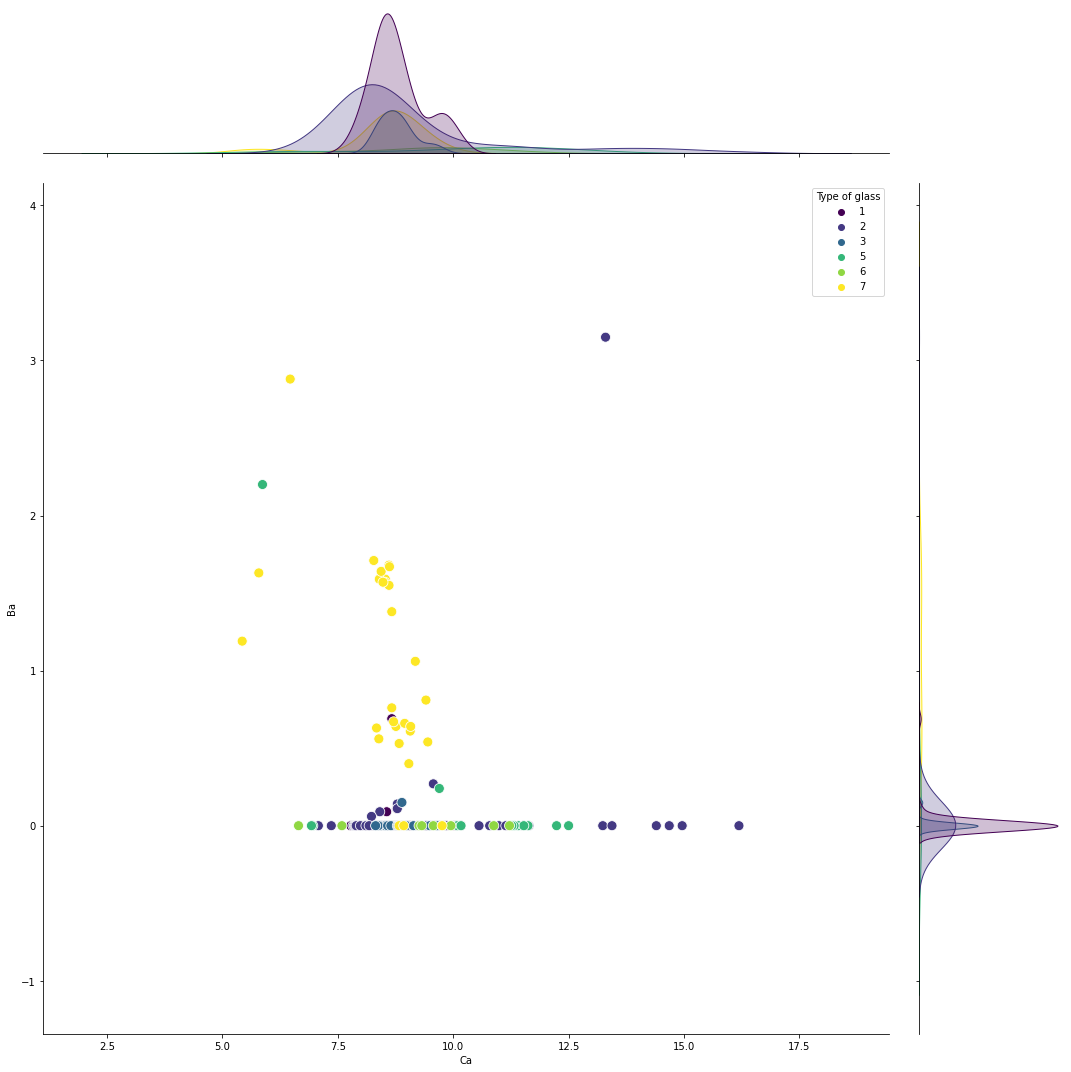

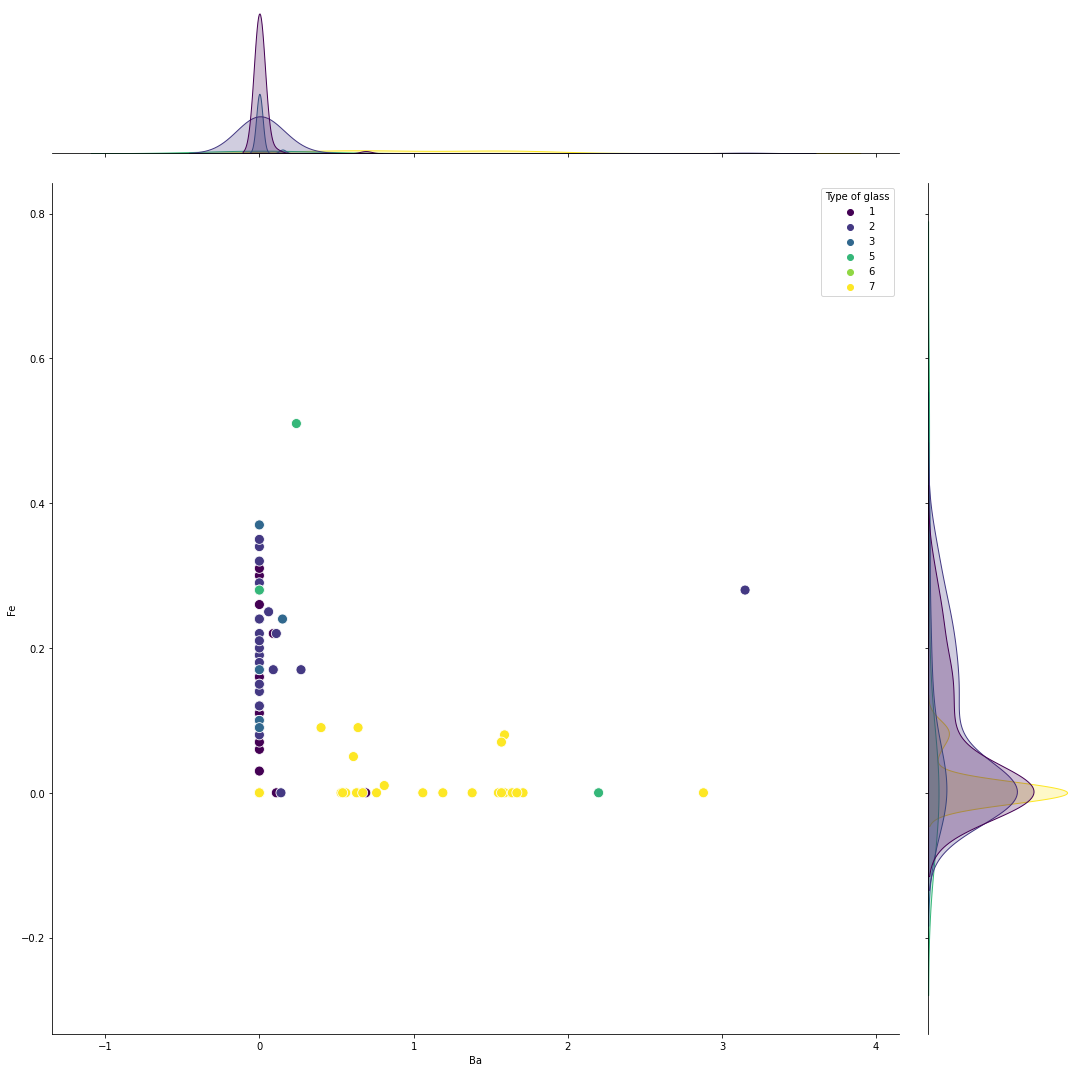

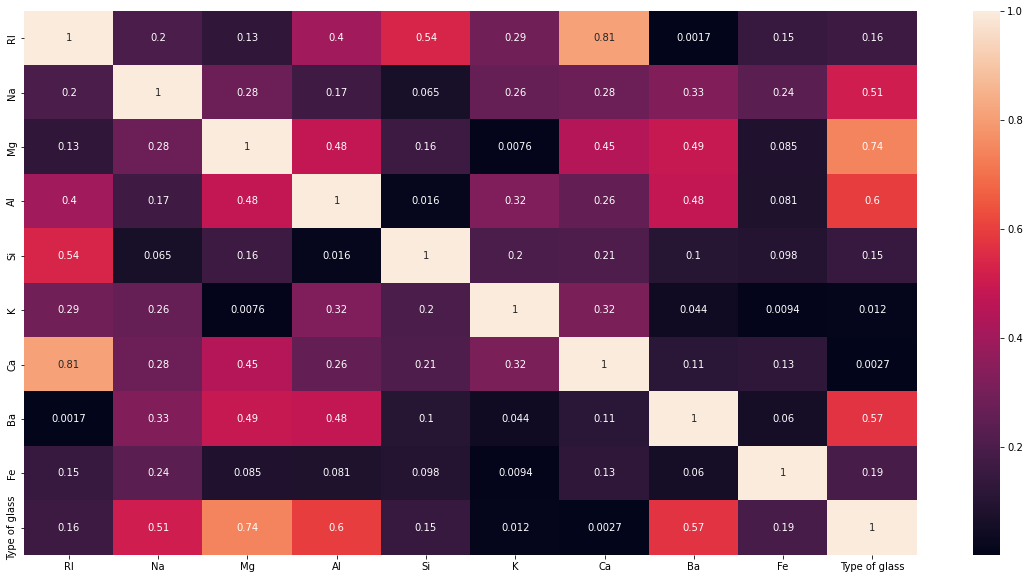

In [ ]:
EDA(df_clean,features,'Type of glass')

# **4. Splitting the data**

In [ ]:
def split(data,feature,target):
  from sklearn.model_selection import train_test_split
  X=data.loc[:,feature].values
  y=data.loc[:,target].values
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=37)# spliting the data
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test=split(df_clean,features,'Type of glass')
print(X_train, X_test, y_train, y_test)

[[ 1.51743 13.3      3.6     ...  8.17     0.       0.     ]
 [ 1.5164  14.37     0.      ...  9.45     0.54     0.     ]
 [ 1.51763 12.61     3.59    ...  8.5      0.       0.     ]
 ...
 [ 1.51627 13.       3.58    ...  8.04     0.       0.     ]
 [ 1.52222 14.43     0.      ... 11.52     0.       0.08   ]
 [ 1.5166  12.99     3.18    ...  8.81     0.       0.24   ]] [[1.52211e+00 1.41900e+01 3.78000e+00 9.10000e-01 7.13600e+01 2.30000e-01
  9.14000e+00 0.00000e+00 3.70000e-01]
 [1.51800e+00 1.37100e+01 3.93000e+00 1.54000e+00 7.18100e+01 5.40000e-01
  8.21000e+00 0.00000e+00 1.50000e-01]
 [1.51508e+00 1.51500e+01 0.00000e+00 2.25000e+00 7.35000e+01 0.00000e+00
  8.34000e+00 6.30000e-01 0.00000e+00]
 [1.51769e+00 1.36500e+01 3.66000e+00 1.11000e+00 7.27700e+01 1.10000e-01
  8.60000e+00 0.00000e+00 0.00000e+00]
 [1.51811e+00 1.33300e+01 3.85000e+00 1.25000e+00 7.27800e+01 5.20000e-01
  8.12000e+00 0.00000e+00 0.00000e+00]
 [1.52725e+00 1.38000e+01 3.15000e+00 6.60000e-01 7.05700e+01 8

# **5. Scaling the data**

In [ ]:
def scaling(train,test):
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler() #scaling the data  
  X_train_scale=scaler.fit_transform(train) 
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

In [ ]:
X_train_scale,X_test_scale=scaling(X_train,X_test)
#print(X_train_scale,X_test_scale)

# **6. Build the model**

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score,roc_auc_score

In [ ]:
def algorithm (model,X_train, X_test, y_train, y_test,k):
  mod=model
  mod.fit(X_train, y_train)
  y_predict_mod=mod.predict(X_test)
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod})
  score=accuracy_score(y_test,y_predict_mod)
  print('for ' ,k ,' value ',"Train Accuracy : ",round(mod.score(X_train,y_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(mod, X_train, y_train, cv=6)),3))
  return y_predict_mod,result,score,mod

# **i) Logistic Regression algorithm**

In [ ]:
y_predict_log,result_L,score_L,log=algorithm(LogisticRegression(random_state=37),X_train_scale, X_test_scale, y_train, y_test,1)
print(y_predict_log)
print(result_L)
print(' Score of LogisticRegression algorithmn is ', score_L)

for  1  value  Train Accuracy :  0.724 Val Accuracy :  0.594
[1 2 7 1 1 1 1 7 1 7 2 1 2 2 1 2 5 2 1 1 2 6 1 5 2 2 1 1 7 7 1 2 7 1 5 2 2
 2 1 6 1 2 3]
    actual  predict
0        3        1
1        2        2
2        7        7
3        3        1
4        2        1
5        2        1
6        2        1
7        7        7
8        1        1
9        7        7
10       2        2
11       1        1
12       1        2
13       2        2
14       3        1
15       2        2
16       7        5
17       5        2
18       2        1
19       1        1
20       2        2
21       6        6
22       1        1
23       2        5
24       1        2
25       1        2
26       1        1
27       1        1
28       7        7
29       7        7
30       1        1
31       2        2
32       7        7
33       3        1
34       5        5
35       2        2
36       2        2
37       2        2
38       1        1
39       6        6
40       1        1
41       2

# **ii) KNN classifier algorithm**

In [ ]:
for i in range (1,25):
  algorithm(KNeighborsClassifier(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  1.0 Val Accuracy :  0.677
for  2  value  Train Accuracy :  0.812 Val Accuracy :  0.694
for  3  value  Train Accuracy :  0.835 Val Accuracy :  0.683
for  4  value  Train Accuracy :  0.788 Val Accuracy :  0.682
for  5  value  Train Accuracy :  0.794 Val Accuracy :  0.635
for  6  value  Train Accuracy :  0.747 Val Accuracy :  0.629
for  7  value  Train Accuracy :  0.712 Val Accuracy :  0.6
for  8  value  Train Accuracy :  0.729 Val Accuracy :  0.624
for  9  value  Train Accuracy :  0.676 Val Accuracy :  0.623
for  10  value  Train Accuracy :  0.729 Val Accuracy :  0.635
for  11  value  Train Accuracy :  0.676 Val Accuracy :  0.611
for  12  value  Train Accuracy :  0.682 Val Accuracy :  0.606
for  13  value  Train Accuracy :  0.7 Val Accuracy :  0.606
for  14  value  Train Accuracy :  0.676 Val Accuracy :  0.583
for  15  value  Train Accuracy :  0.694 Val Accuracy :  0.606
for  16  value  Train Accuracy :  0.671 Val Accuracy :  0.612
for  17  value  Train A

In [ ]:
y_predict_knn,result_K,score_K,knn=algorithm(KNeighborsClassifier(2),X_train_scale, X_test_scale, y_train, y_test,2)
print(y_predict_knn)
print(result_K)
print(' Score of KNN classifier algorithmn is ', score_K)

for  2  value  Train Accuracy :  0.812 Val Accuracy :  0.694
[1 2 7 1 1 1 2 7 1 7 2 1 2 2 1 2 2 2 1 1 1 2 1 5 1 1 1 1 6 7 1 2 7 3 5 2 1
 2 1 6 1 2 2]
    actual  predict
0        3        1
1        2        2
2        7        7
3        3        1
4        2        1
5        2        1
6        2        2
7        7        7
8        1        1
9        7        7
10       2        2
11       1        1
12       1        2
13       2        2
14       3        1
15       2        2
16       7        2
17       5        2
18       2        1
19       1        1
20       2        1
21       6        2
22       1        1
23       2        5
24       1        1
25       1        1
26       1        1
27       1        1
28       7        6
29       7        7
30       1        1
31       2        2
32       7        7
33       3        3
34       5        5
35       2        2
36       2        1
37       2        2
38       1        1
39       6        6
40       1        1
41       2

# **iii)Decision Tree algorithm**

In [ ]:
for i in range(1,25):
  algorithm(DecisionTreeClassifier(max_depth=i,random_state=37),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.465 Val Accuracy :  0.459
for  2  value  Train Accuracy :  0.624 Val Accuracy :  0.594
for  3  value  Train Accuracy :  0.729 Val Accuracy :  0.641
for  4  value  Train Accuracy :  0.782 Val Accuracy :  0.629
for  5  value  Train Accuracy :  0.824 Val Accuracy :  0.635
for  6  value  Train Accuracy :  0.871 Val Accuracy :  0.641
for  7  value  Train Accuracy :  0.918 Val Accuracy :  0.664
for  8  value  Train Accuracy :  0.953 Val Accuracy :  0.658
for  9  value  Train Accuracy :  0.976 Val Accuracy :  0.653
for  10  value  Train Accuracy :  0.988 Val Accuracy :  0.611
for  11  value  Train Accuracy :  0.994 Val Accuracy :  0.617
for  12  value  Train Accuracy :  1.0 Val Accuracy :  0.617
for  13  value  Train Accuracy :  1.0 Val Accuracy :  0.617
for  14  value  Train Accuracy :  1.0 Val Accuracy :  0.617
for  15  value  Train Accuracy :  1.0 Val Accuracy :  0.617
for  16  value  Train Accuracy :  1.0 Val Accuracy :  0.617
for  17  value  Train Accur

In [ ]:
y_predict_dt,result_D,score_D,dt=algorithm(DecisionTreeClassifier(max_depth=7,random_state=37),X_train_scale, X_test_scale, y_train, y_test,7)
print(y_predict_dt)
print(result_D)
print(' Score of Decision Tree algorithmn is ', score_D)

for  7  value  Train Accuracy :  0.918 Val Accuracy :  0.664
[2 2 7 1 1 2 2 7 1 7 2 1 2 2 2 2 2 5 2 1 2 2 1 5 2 2 1 1 7 7 1 2 7 3 5 2 1
 2 1 6 1 2 7]
    actual  predict
0        3        2
1        2        2
2        7        7
3        3        1
4        2        1
5        2        2
6        2        2
7        7        7
8        1        1
9        7        7
10       2        2
11       1        1
12       1        2
13       2        2
14       3        2
15       2        2
16       7        2
17       5        5
18       2        2
19       1        1
20       2        2
21       6        2
22       1        1
23       2        5
24       1        2
25       1        2
26       1        1
27       1        1
28       7        7
29       7        7
30       1        1
31       2        2
32       7        7
33       3        3
34       5        5
35       2        2
36       2        1
37       2        2
38       1        1
39       6        6
40       1        1
41       2

In [ ]:
importance = dt.feature_importances_
list(zip(importance,features))

[(0.12674192540649165, 'RI'),
 (0.06913830948735834, 'Na'),
 (0.17897975402054786, 'Mg'),
 (0.18845130310107872, 'Al'),
 (0.06424728372014105, 'Si'),
 (0.04392580370204411, 'K'),
 (0.06848484839589965, 'Ca'),
 (0.19869779995232692, 'Ba'),
 (0.061332972214111846, 'Fe')]

# **iv) Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for i in [80,81,82,83,84,85,86,87,88,89,90]:
  algorithm(RandomForestClassifier(max_depth= 3,n_estimators=i,random_state=37,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  80  value  Train Accuracy :  0.782 Val Accuracy :  0.682
for  81  value  Train Accuracy :  0.788 Val Accuracy :  0.682
for  82  value  Train Accuracy :  0.782 Val Accuracy :  0.682
for  83  value  Train Accuracy :  0.782 Val Accuracy :  0.682
for  84  value  Train Accuracy :  0.788 Val Accuracy :  0.683
for  85  value  Train Accuracy :  0.788 Val Accuracy :  0.677
for  86  value  Train Accuracy :  0.782 Val Accuracy :  0.677
for  87  value  Train Accuracy :  0.788 Val Accuracy :  0.677
for  88  value  Train Accuracy :  0.788 Val Accuracy :  0.677
for  89  value  Train Accuracy :  0.788 Val Accuracy :  0.688
for  90  value  Train Accuracy :  0.788 Val Accuracy :  0.682


In [ ]:
y_predict_rfc,result_R,score_R,rfc=algorithm(RandomForestClassifier(max_depth= 4,n_estimators=89,random_state=37,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,89)
print(y_predict_rfc)
print(result_R)
print(' Score of random forest algorithmn is ', score_R)

for  89  value  Train Accuracy :  0.841 Val Accuracy :  0.724
[1 2 7 1 1 1 1 7 1 7 2 1 2 2 1 2 2 5 1 1 2 2 1 5 1 2 1 1 7 7 1 2 7 1 5 2 2
 2 1 6 1 1 2]
    actual  predict
0        3        1
1        2        2
2        7        7
3        3        1
4        2        1
5        2        1
6        2        1
7        7        7
8        1        1
9        7        7
10       2        2
11       1        1
12       1        2
13       2        2
14       3        1
15       2        2
16       7        2
17       5        5
18       2        1
19       1        1
20       2        2
21       6        2
22       1        1
23       2        5
24       1        1
25       1        2
26       1        1
27       1        1
28       7        7
29       7        7
30       1        1
31       2        2
32       7        7
33       3        1
34       5        5
35       2        2
36       2        2
37       2        2
38       1        1
39       6        6
40       1        1
41       

# **v)Xgboost classifier**

In [ ]:
import xgboost as xgb

In [ ]:
for i in np.arange(0.15,0.25,0.01):
  algorithm(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=37),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.15  value  Train Accuracy :  1.0 Val Accuracy :  0.753
for  0.16  value  Train Accuracy :  1.0 Val Accuracy :  0.753
for  0.17  value  Train Accuracy :  1.0 Val Accuracy :  0.753
for  0.18000000000000002  value  Train Accuracy :  1.0 Val Accuracy :  0.771
for  0.19000000000000003  value  Train Accuracy :  1.0 Val Accuracy :  0.759
for  0.20000000000000004  value  Train Accuracy :  1.0 Val Accuracy :  0.753
for  0.21000000000000005  value  Train Accuracy :  1.0 Val Accuracy :  0.735
for  0.22000000000000006  value  Train Accuracy :  1.0 Val Accuracy :  0.759
for  0.23000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.753
for  0.24000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.747


In [ ]:
y_predict_Xgb,result_X,score_X,Xgb=algorithm(xgb.XGBClassifier(learning_rate=0.18,n_estimators= 100,random_state=37),X_train_scale, X_test_scale, y_train, y_test,0.18)
print(y_predict_Xgb)
print(result_X)
print(' Score of Xgboost algorithmn is ', score_X)

for  0.18  value  Train Accuracy :  1.0 Val Accuracy :  0.771
[1 2 7 1 2 2 2 7 1 7 2 1 2 2 2 2 5 5 1 1 2 6 3 2 1 1 1 1 7 7 1 2 7 3 5 2 2
 2 1 6 1 2 1]
    actual  predict
0        3        1
1        2        2
2        7        7
3        3        1
4        2        2
5        2        2
6        2        2
7        7        7
8        1        1
9        7        7
10       2        2
11       1        1
12       1        2
13       2        2
14       3        2
15       2        2
16       7        5
17       5        5
18       2        1
19       1        1
20       2        2
21       6        6
22       1        3
23       2        2
24       1        1
25       1        1
26       1        1
27       1        1
28       7        7
29       7        7
30       1        1
31       2        2
32       7        7
33       3        3
34       5        5
35       2        2
36       2        2
37       2        2
38       1        1
39       6        6
40       1        1
41       

# **vi)Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
y_predict_vot,result_V,score_V,vot=algorithm(VotingClassifier(estimators= [('LR',log),('KNN',knn),('DT',dt),('RF',rfc),('XGB',Xgb)],voting='soft'),X_train_scale, X_test_scale, y_train, y_test,'5 models')
print(y_predict_vot)
print(result_V)
print(' Score of Voting classifier algorithmn is ', score_V)

for  5 models  value  Train Accuracy :  0.959 Val Accuracy :  0.752
[1 2 7 1 1 1 2 7 1 7 2 1 2 2 2 2 5 5 1 1 2 2 1 5 1 1 1 1 7 7 1 2 7 3 5 2 2
 2 1 6 1 2 2]
    actual  predict
0        3        1
1        2        2
2        7        7
3        3        1
4        2        1
5        2        1
6        2        2
7        7        7
8        1        1
9        7        7
10       2        2
11       1        1
12       1        2
13       2        2
14       3        2
15       2        2
16       7        5
17       5        5
18       2        1
19       1        1
20       2        2
21       6        2
22       1        1
23       2        5
24       1        1
25       1        1
26       1        1
27       1        1
28       7        7
29       7        7
30       1        1
31       2        2
32       7        7
33       3        3
34       5        5
35       2        2
36       2        2
37       2        2
38       1        1
39       6        6
40       1        1
41 

# **7.  Evaluation metrics**

In [ ]:
from yellowbrick.classifier import ROCAUC
def evaluate(mod,X_train,X_test,y_train,y_test,predict):
  visual=ROCAUC(mod)
  visual.fit(X_train,y_train)
  roc=visual.score(X_test,y_test)
  visual.show()
  acc=accuracy_score(y_test,predict)
  #roc=roc_auc_score(y_test,predict,multi_class='ovr',average='macro')
  #plot_roc_curve(mod,X_train,y_train,X_test,y_test)
  print('accuracy score of data set : ', acc)
  print('AUROC  score of data set : ', roc)
  return visual


# **i) Evaluation metric for logistic regression algorithm**

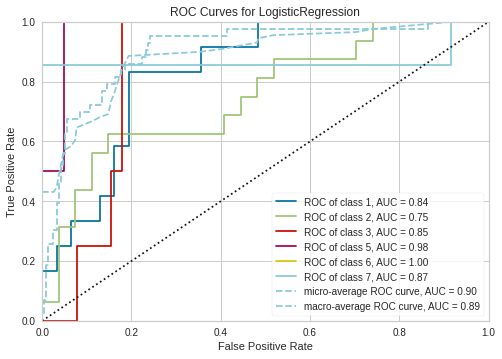

accuracy score of data set :  0.6511627906976745
AUROC  score of data set :  0.8889111814698076


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d4a70760>,
       estimator=LogisticRegression())

In [ ]:
evaluate(log,X_train_scale,X_test_scale,y_train,y_test,y_predict_log)

In [ ]:
def PlotDecisionRegion(mod,feature,target):
  X=df_clean.loc[:,feature].values
  y=df_clean.loc[:,target].values
  model=mod
  model.fit(X,y)
  plt.figure(figsize=(15,10))
  plot_decision_regions(X,y,model,legend=2)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


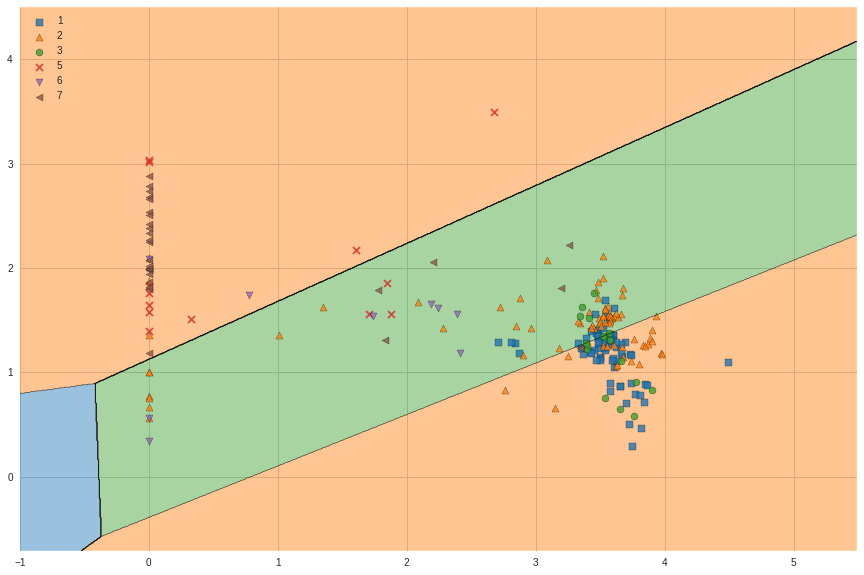

In [ ]:
PlotDecisionRegion(log,['Mg','Al'],'Type of glass')

In [ ]:
print('error rate of model is : ',np.mean(y_predict_log!=y_test))

error rate of model is :  0.3488372093023256


# **ii) Evaluation metric for KNN classifier algorithm**

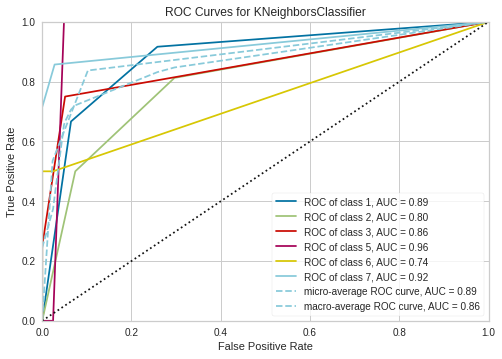

accuracy score of data set :  0.6744186046511628
AUROC  score of data set :  0.8625875833414189


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d7e02220>,
       estimator=KNeighborsClassifier(n_neighbors=2))

In [ ]:
evaluate(knn,X_train_scale,X_test_scale,y_train,y_test,y_predict_knn)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


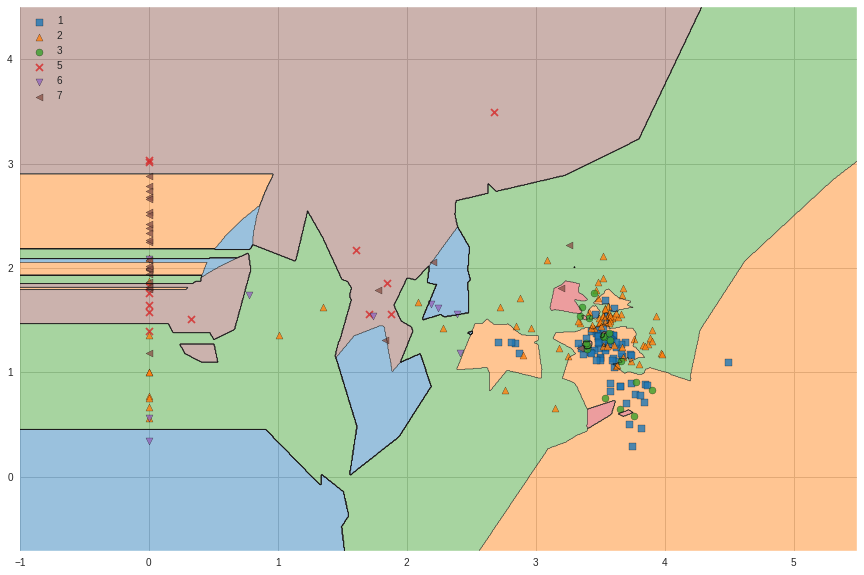

In [ ]:
PlotDecisionRegion(knn,['Mg','Al'],'Type of glass')

In [ ]:
print('error rate of model is : ',np.mean(y_predict_knn!=y_test))

error rate of model is :  0.32558139534883723


# **iii) Evaluation metric for Decision Tree classifier algorithm**

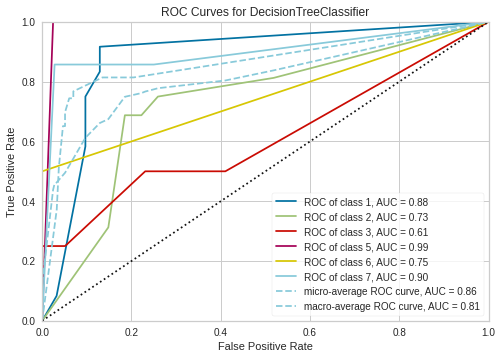

accuracy score of data set :  0.7209302325581395
AUROC  score of data set :  0.8116053986554577


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d4d12460>,
       estimator=DecisionTreeClassifier(max_depth=7, random_state=37))

In [ ]:
evaluate(dt,X_train_scale,X_test_scale,y_train,y_test,y_predict_dt)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


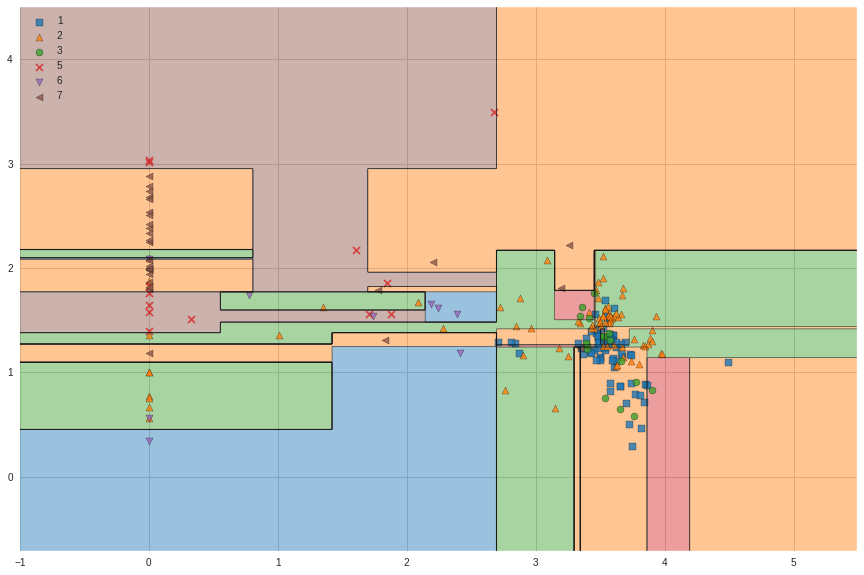

In [ ]:
PlotDecisionRegion(dt,['Mg','Al'],'Type of glass')

In [ ]:
from sklearn import tree

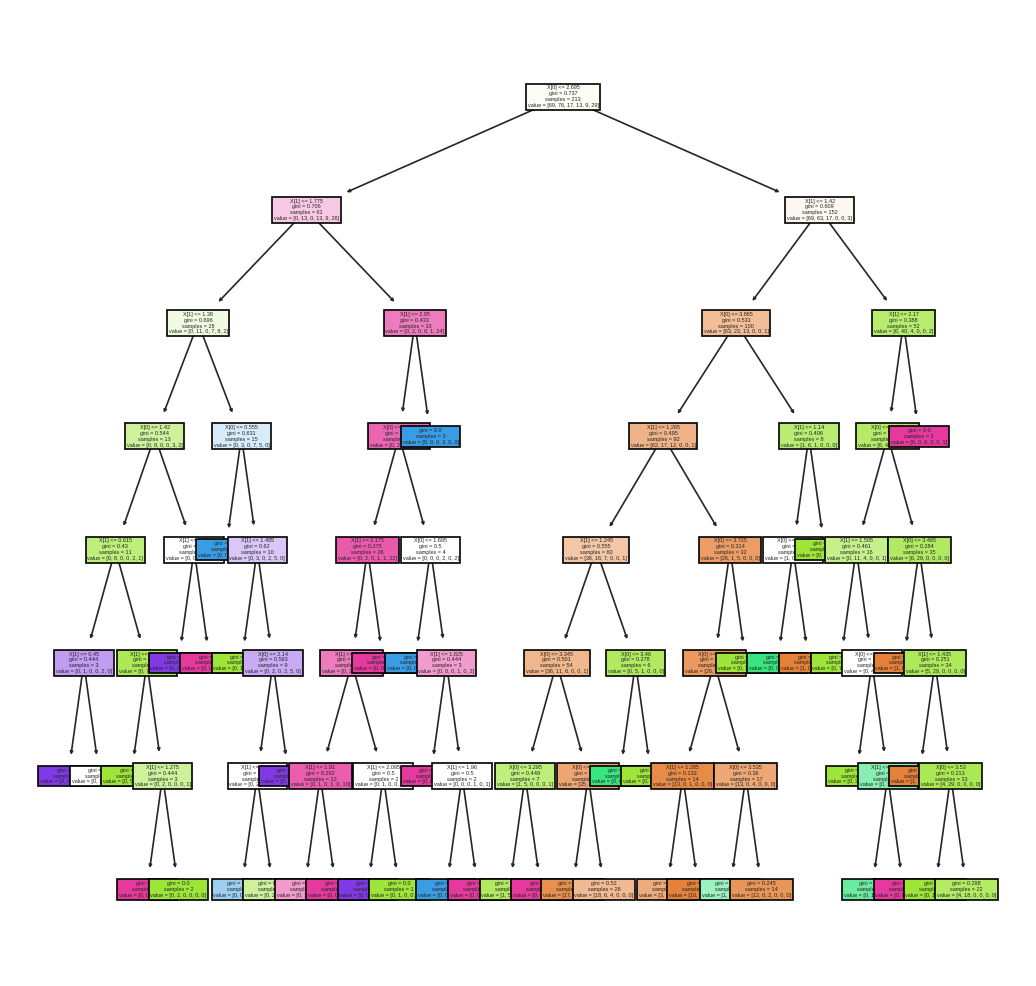

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=400)
tree.plot_tree(dt,filled = True);
fig.savefig('imagename.png')

In [ ]:
print('error rate of model is : ',np.mean(y_predict_dt!=y_test))

error rate of model is :  0.27906976744186046


# **iv)Evaluation metric for RandomForest classifier**

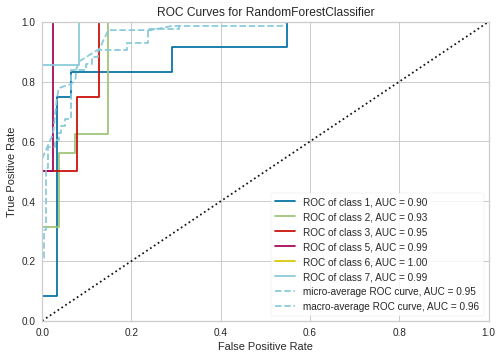

accuracy score of data set :  0.6744186046511628
AUROC  score of data set :  0.9636248028330487


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d7a6ae20>,
       estimator=RandomForestClassifier(max_depth=4, max_features='sqrt',
                                        n_estimators=89, random_state=37))

In [ ]:
evaluate(rfc,X_train_scale,X_test_scale,y_train,y_test,y_predict_rfc)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


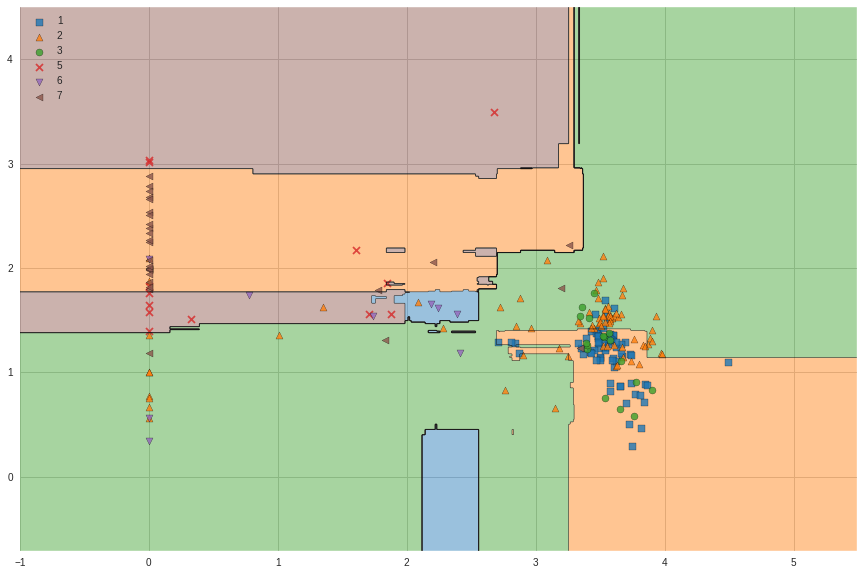

In [ ]:
PlotDecisionRegion(rfc,['Mg','Al'],'Type of glass')

In [ ]:
print('error rate of model is : ',np.mean(y_predict_rfc!=y_test))

error rate of model is :  0.32558139534883723


# **v)Evaluation metric for Xgboost classifier**

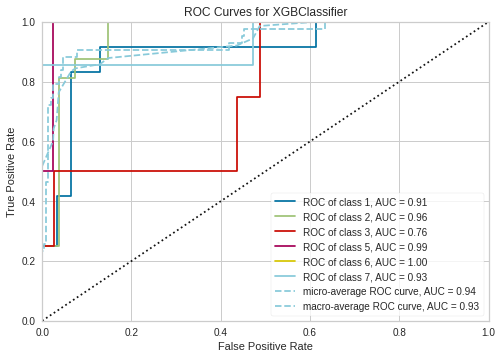

accuracy score of data set :  0.813953488372093
AUROC  score of data set :  0.9347377641522124


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d7794310>,
       estimator=XGBClassifier(learning_rate=0.18, objective='multi:softprob',
                               random_state=37))

In [ ]:
evaluate(Xgb,X_train_scale,X_test_scale,y_train,y_test,y_predict_Xgb)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


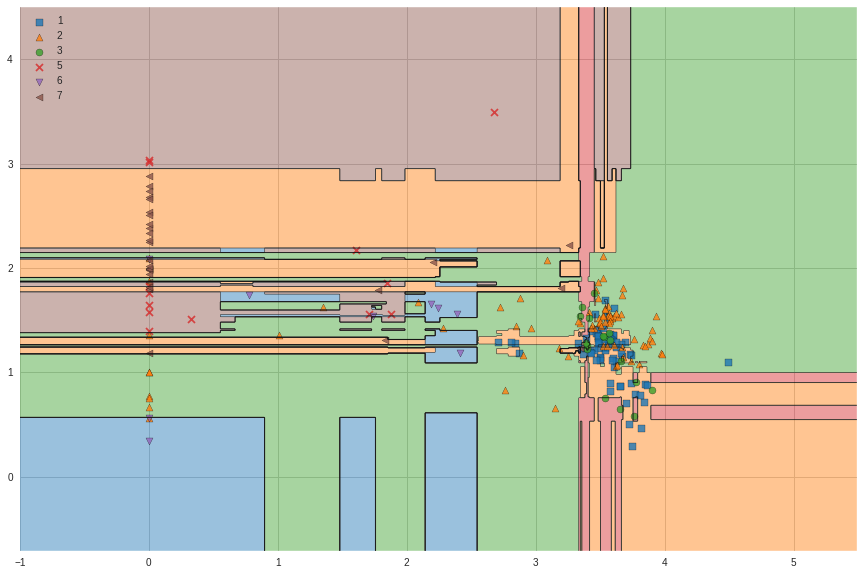

In [ ]:
PlotDecisionRegion(Xgb,['Mg','Al'],'Type of glass')

In [ ]:
print('error rate of model is : ',np.mean(y_predict_Xgb!=y_test))

error rate of model is :  0.18604651162790697


# **vi) evaluation metric for Voting classifier**

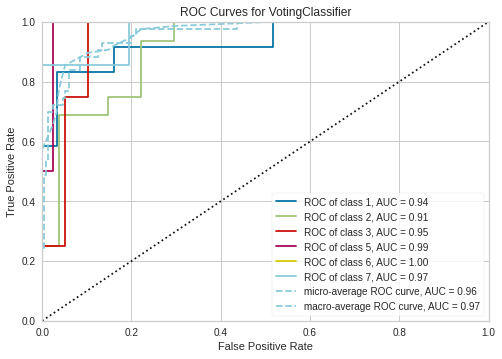

accuracy score of data set :  0.7674418604651163
AUROC  score of data set :  0.9658496071620171


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d78ac130>,
       estimator=VotingClassifier(estimators=[('LR',
                                               LogisticRegression(random_state=37)),
                                              ('KNN',
                                               KNeighborsClassifier(n_neighbors=2)),
                                              ('DT',
                                               DecisionTreeClassifier(max_depth=7,
                                                                      random_state=37)),
                                              ('RF',
                                               RandomForestClassifier(max_depth=4,
                                                                      max_features='sqrt',
                                                                      n_estimators=89,
                                                                      random_state=37)),
                   

In [ ]:
evaluate(vot,X_train_scale,X_test_scale,y_train,y_test,y_predict_vot)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


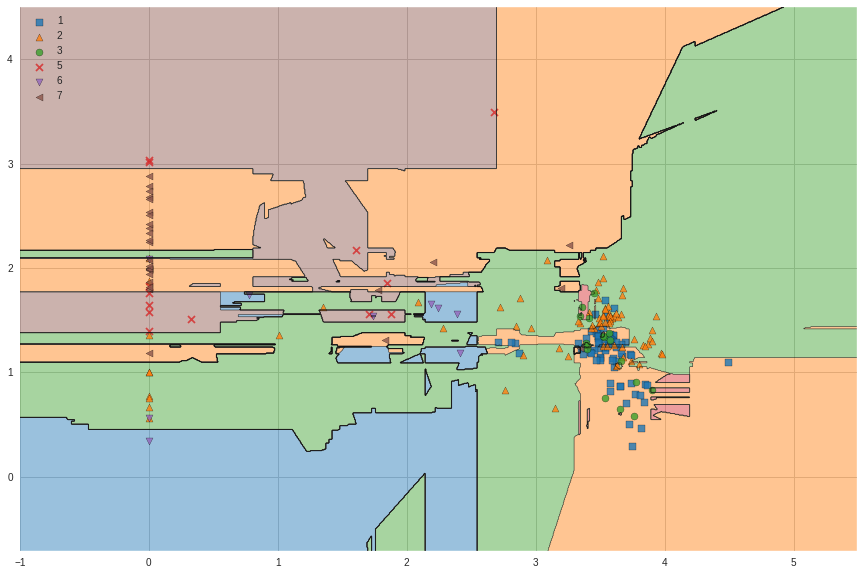

In [ ]:
PlotDecisionRegion(vot,['Mg','Al'],'Type of glass')

In [ ]:
print('error rate of model is : ',np.mean(y_predict_vot!=y_test))

error rate of model is :  0.23255813953488372
